In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from utils import color_coding

### Graph Visualization

In [2]:
GRAPH_PATH = './graphs/graph_2.graphml'
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

In [3]:
G = nx.read_graphml(GRAPH_PATH)

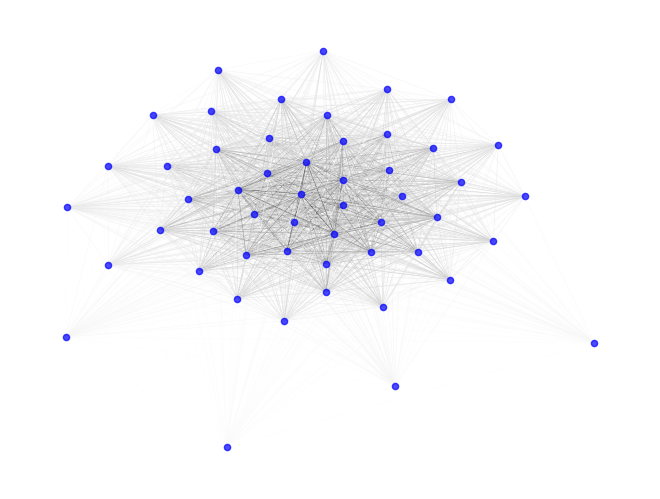

In [4]:
cmap = plt.cm.Greys # edge colors
nx.draw(G, 
        pos= nx.spring_layout(G, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

Try coloring nodes by gender

In [5]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)

In [6]:
colors = { "pp"    : {"Sí":'#d7191c', "No":'#2c7bb6', "nvr":'#ffffbf'}, 
           "p_cuid": {"Sí":'#d7191c', "No":'#2c7bb6', "nvr":'#ffffbf'},
           "genere": {"m":"#2c7bb6", "f":"#d7191c", "d":"#fdae61", "nvr":"#abd9e9"},
           "edat"  : {'1':"#d73027", '2':"#fc8d59", '3':"#fee090", '4':"#e0f3f8", '5':"#91bfdb", '6':"#4575b4", 'nvr':"gray"}   
      }
color_map = color_coding(G, df_sociodem, sociodem_entry='genere',colors_dict=colors)
color_map

['#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#2c7bb6',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c',
 '#d7191c']

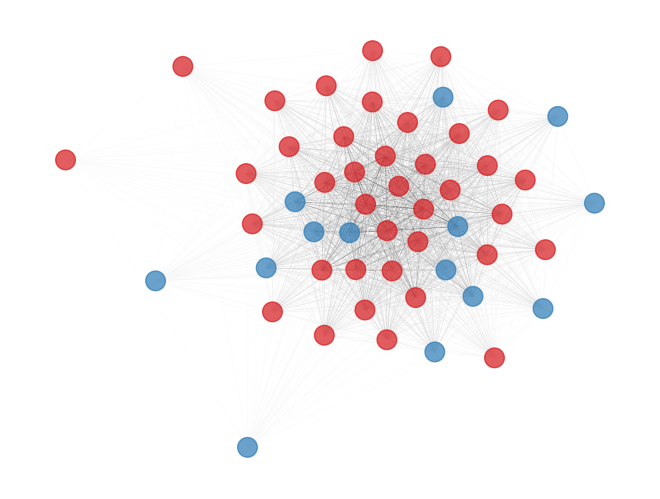

In [7]:
cmap = plt.cm.Greys 
nx.draw(G, 
        pos= nx.spring_layout(G, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

### Graph analysis

Node degrees

<Axes: ylabel='Frequency'>

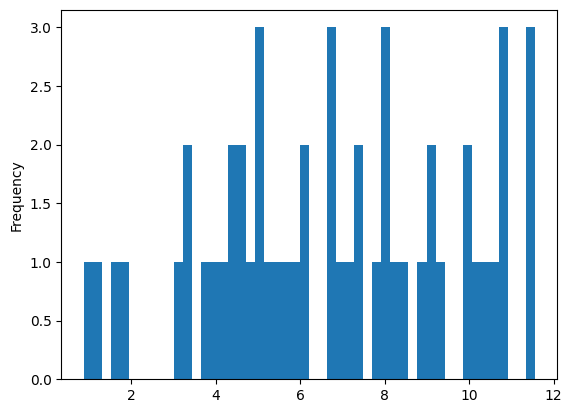

In [8]:
k = [x[1] for x in G.degree(weight='weight')]
k_dS = pd.Series(k)
k_dS.plot(kind='hist', bins=50)

In [9]:
edge_attr = nx.get_edge_attributes(G, 'weight')

In [10]:
edge_attr

{('4e53c5c', 'bd4b2f4'): 0.39999999999999997,
 ('4e53c5c', 'aa07d95'): 0.24615384615384617,
 ('4e53c5c', 'db7d9c3'): 0.11538461538461539,
 ('4e53c5c', '6bac72b'): 0.18205128205128204,
 ('4e53c5c', '962a7dd'): 0.10512820512820512,
 ('4e53c5c', '446ad6c'): 0.2897435897435897,
 ('4e53c5c', '693ef79'): 0.12307692307692307,
 ('4e53c5c', '8ec15bc'): 0.33076923076923076,
 ('4e53c5c', '41f2447'): 0.10256410256410256,
 ('4e53c5c', '34d8485'): 0.39743589743589736,
 ('4e53c5c', '49db8c4'): 0.05384615384615385,
 ('4e53c5c', 'c4bba29'): 0.3794871794871795,
 ('4e53c5c', '1a8e45b'): 0.2846153846153846,
 ('4e53c5c', '6e93efd'): 0.2128205128205128,
 ('4e53c5c', 'c94e42e'): 0.0358974358974359,
 ('4e53c5c', '7a35b75'): 0.2205128205128205,
 ('4e53c5c', '6568ea1'): 0.1564102564102564,
 ('4e53c5c', '2f5762a'): 0.14871794871794872,
 ('4e53c5c', '62447b9'): 0.14615384615384616,
 ('4e53c5c', '2541155'): 0.34615384615384615,
 ('4e53c5c', '7b3c431'): 0.13846153846153847,
 ('4e53c5c', '52d61f6'): 0.36923076923076